# Data Exploration

Python Version 3.12.14

Prerequisites:
```
python binary_preprocess.py
python dataset_split.py
python image_preprocess.py
```

In [1]:
import os
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# set default size to display larger figures
plt.rcParams['figure.figsize'] = (10.0, 8.0)

ModuleNotFoundError: No module named 'ujson'

## Data exploration script

It computes:
- number of examples
- fraction of user labeled examples

It plots:
- class distributions
- holds used for easy (6B+), intermediate (7B+) and hard (8B+) problems

It describes:
- train/val/test splits

In [2]:
MBversions = 2017
ppDirName="../DATA/binary"

# input type cleanup to match expected type
if not isinstance(MBversions, list):
    MBversions = [MBversions]

# initialization
X_list, X_type_list, y_list, y_user_list = [], [], [], []

for MBversion in MBversions:
    MBversion = str(MBversion)
    print("{:-^100}".format("Data exploration for MoonBoard version {}".format(MBversion)))
    # path to the data
    ppVersionDirName = ppDirName
    # import the data
    X_list.append(np.load(os.path.join(ppVersionDirName, "X.npy")))
    X_type_list.append(np.load(os.path.join(ppVersionDirName, "X_type.npy")))
    y_list.append(np.load(os.path.join(ppVersionDirName, "y.npy")))
    y_user_list.append(np.load(os.path.join(ppVersionDirName, "y_user.npy")))

X, X_type, y, y_user = np.vstack(X_list), np.vstack(X_type_list), np.hstack(y_list), np.hstack(y_user_list)

with open(os.path.join(ppVersionDirName, "grade2class.json")) as json_file:
    grade2class = json.load(json_file)

# number of examples
n_total = y.shape[0]
print("There are in total {} examples (distinct MoonBoard version {} problems).".format(n_total, MBversion))

----------------------------Data exploration for MoonBoard version 2017-----------------------------


FileNotFoundError: [Errno 2] No such file or directory: '../DATA/binary/X.npy'

There are 20043 examples in true label: 1.00 of the whole dataset.
There are 7304 examples in user assigned grade: 0.36 of the whole dataset.


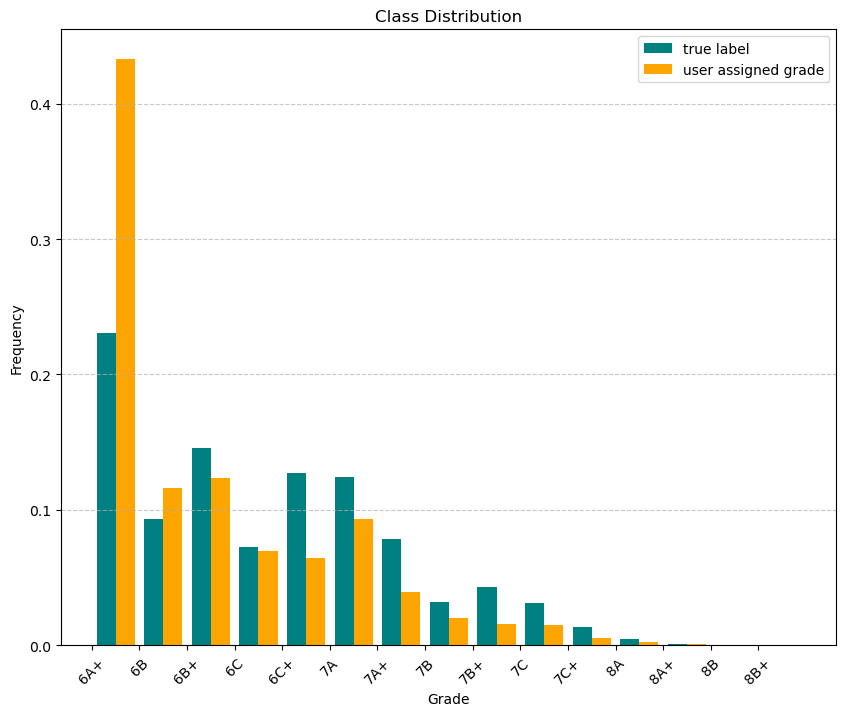

Distribution of classes in true label :
{'6A+': 23.1, '6B': 9.3, '6B+': 14.6, '6C': 7.3, '6C+': 12.8, '7A': 12.4, '7A+': 7.9, '7B': 3.2, '7B+': 4.3, '7C': 3.1, '7C+': 1.4, '8A': 0.4, '8A+': 0.1, '8B': 0.0, '8B+': 0.1}
Distribution of classes in user assigned grade :
{'6A+': 43.3, '6B': 11.6, '6B+': 12.3, '6C': 7.0, '6C+': 6.5, '7A': 9.3, '7A+': 3.9, '7B': 2.0, '7B+': 1.6, '7C': 1.5, '7C+': 0.6, '8A': 0.2, '8A+': 0.1, '8B': 0.0, '8B+': 0.0}


In [ ]:
# Plot Class Distribution
y_list = [y, y_user]
fig_legend = ["true label", "user assigned grade"]
y_user_list=None

if not isinstance(y_list, list):
    y_list = [y_list]

for k, subset_name in enumerate(fig_legend):
    y_filtered = y_list[k][y_list[k] != -1]
    # number of examples
    n_examples = y_filtered.shape[0]
    print("There are {} examples in {}: {:.2f} of the whole dataset.".format(n_examples, subset_name, n_examples/n_total))

    if not y_user_list is None:
        y_user_filtered = y_user_list[k][y_user_list[k] != -1]
        print("Only {:.2f}% of them have a user-assigned grade".format(y_user_filtered.shape[0]/n_examples*100))


# class distribution
class_min = min(grade2class.values())
class_max = max(grade2class.values())

colors = ["teal", "orange"]

# Plot the histograms
plt.hist(
    y_list,
    bins=range(class_min, class_max + 2),
    density=True,
    histtype='bar',
    color=colors,
    label=fig_legend
)

# Set legend, labels, and title
plt.legend(fig_legend)
plt.xticks(list(grade2class.values()), list(grade2class.keys()), rotation=45)
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for k, subset_name in enumerate(fig_legend):
    y_filtered = y_list[k][y_list[k] != -1]
    grade2freq = {grade: round(y_filtered[y_filtered==grade2class[grade]].shape[0]/y_filtered.shape[0]*100, 1) for grade in grade2class.keys()}
    print("Distribution of classes in {} :\n{}".format(subset_name, grade2freq))

In [ ]:
def plot_heatmap(grades):
    # plots a heatmap of the holds
    fig, axn = plt.subplots(1, len(grades))
    cbar_ax = fig.add_axes([.91, .25, .03, .5])

    for i, grade in enumerate(grades):
        # filter holds based on their type: only intermediate holds are kept (as start and end holds tend to be most similar and most frequent)
        mask = X_type == 1
        X_filtered = X*mask
        # filter examples based on their label
        X_filtered = X_filtered[y == grade2class[grade],:]
        # build the heatmap
        heatmap = np.reshape(np.sum(X_filtered, axis=0), (18,11))
        freq_heatmap = heatmap / X_filtered.shape[0]
        # plot the heatmap
        ax = sns.heatmap(freq_heatmap, vmax=0.3, cmap='magma', linewidth=0.5, square=True,
                            xticklabels = [str(chr(k)) for k in range(ord("A"), ord("A") + heatmap.shape[1])],
                            yticklabels = range(heatmap.shape[0],0,-1),
                            mask=(freq_heatmap==0), ax=axn[i],
                            cbar = not i, cbar_ax=None if i else cbar_ax)
        ax.set_title(grade)
    plt.show()

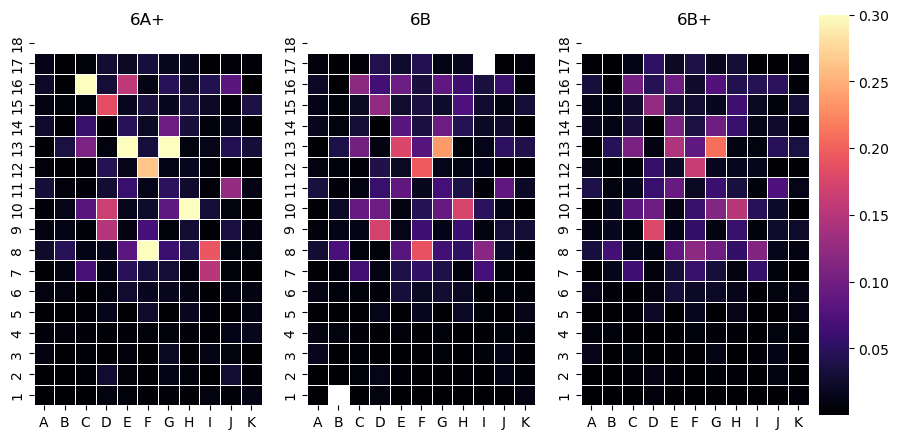

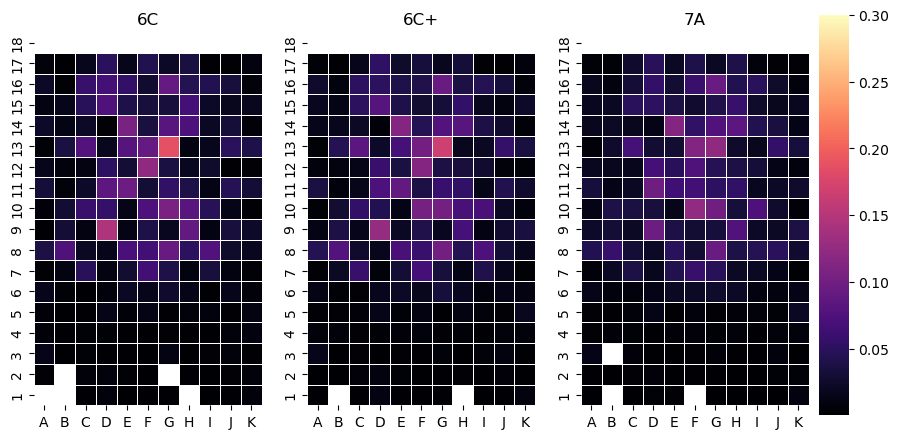

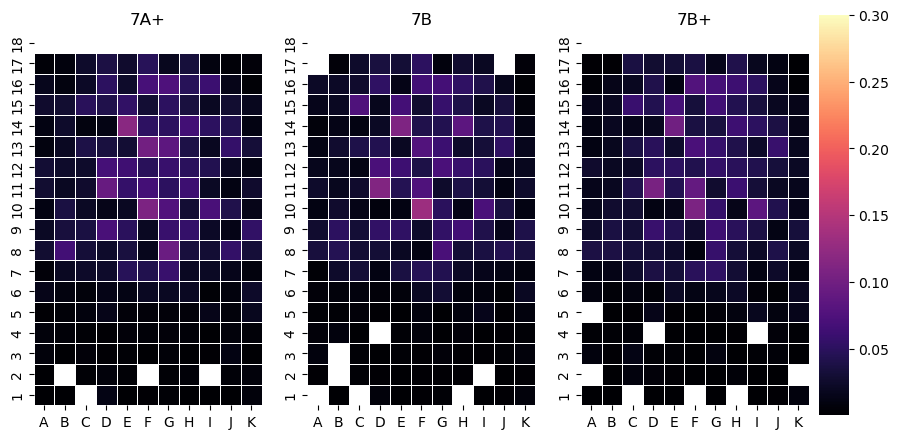

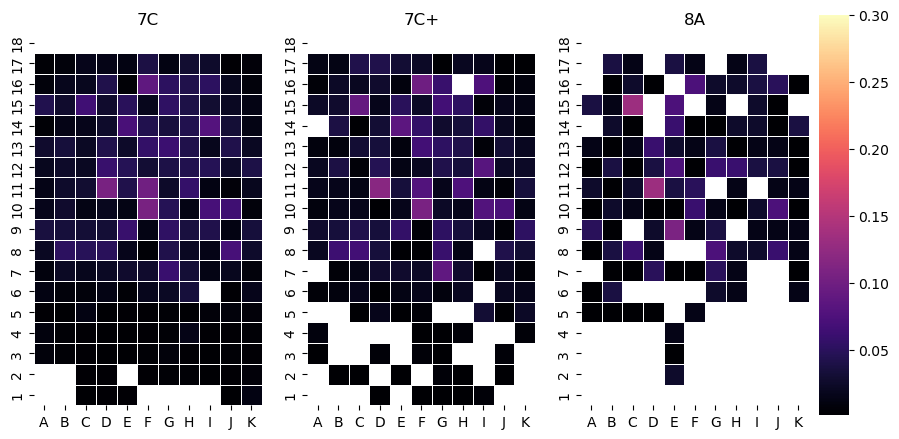

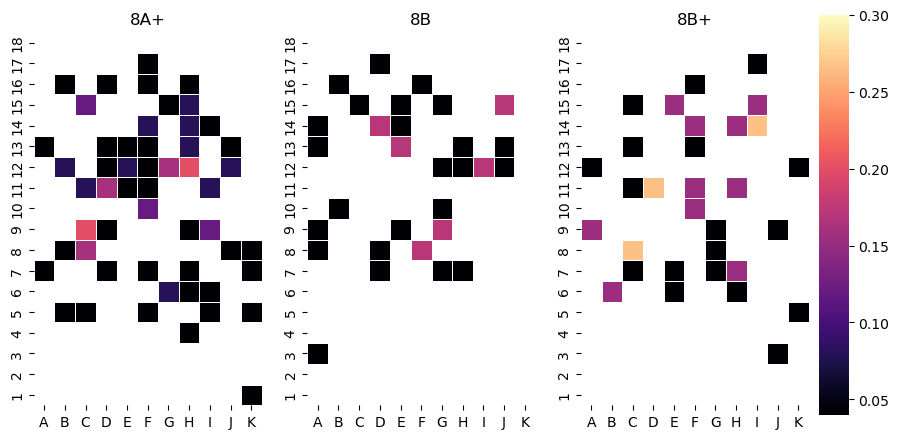

In [ ]:
# '6A+', '6B', '6B+', '6C', '6C+', '7A', '7A+', '7B', '7B+', '7C', '7C+', '8A', '8A+', '8B', '8B+'
plot_heatmap(['6A+', '6B', '6B+'])  #V3-V4
plot_heatmap(['6C', '6C+', '7A'])   #V5-V6
plot_heatmap(['7A+', '7B', '7B+'])  #V7-V8
plot_heatmap(['7C', '7C+', '8A'])   #V9-V11
plot_heatmap(['8A+', '8B', '8B+'])  #V12-V14



In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import nn
from torchvision.transforms import ToTensor, Compose, RandomHorizontalFlip, RandomRotation

In [ ]:
train_transformer = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(MEAN_PIX/255, (1,1,1))])

In [ ]:

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


GRID_DIMS = (18, 11) # dimensions

class NeuralNetwork(nn.Module):

    def __init__(self, n_classes, n_channels=8):
        super(NeuralNetwork, self).__init__()

        self.cnn.Sequential(
            nn.Conv2d(1, 8, 3, 1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(8, 16, 3, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AvgPool2d(2),

            nn.Conv2d(64, 64, 3, 1),
            nn.BatchNorm2d(64),
            nn.ReLU())


        # initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # create channel dimension
        x = torch.unsqueeze(x, 1)       # (N, 1, 18, 11)

        # forward pass through the network
        logits = self.network(x)        # (N, n_classes, 1, 1)

        # reshape to get the scores
        logits = torch.squeeze(logits)       # (N, n_classes)

        return logits

model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    loss_list, accuracy_list = [], []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        correct = (pred.argmax(1) == y).type(torch.float).sum().item()
        accuracy = correct / X.shape[0]

        loss_list.append(loss.item())
        accuracy_list.append(accuracy)

        if batch % 100 == 0:
            print(f"loss: {loss.item():>7f}, accuracy: {accuracy * 100:>0.1f}%")

    return loss_list, accuracy_list


def test(dataloader, model):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    return test_loss, accuracy

# Training loop with plotting
epochs = 10
train_loss, train_accuracy, test_loss, test_accuracy = [], [], [], []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    epoch_train_loss, epoch_train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    epoch_test_loss, epoch_test_accuracy = test(test_dataloader, model)

    train_loss.append(np.mean(epoch_train_loss))
    train_accuracy.append(np.mean(epoch_train_accuracy))
    test_loss.append(epoch_test_loss)
    test_accuracy.append(epoch_test_accuracy)

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label="Training Loss")
plt.plot(range(1, epochs + 1), test_loss, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracy, label="Training Accuracy")
plt.plot(range(1, epochs + 1), test_accuracy, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

plt.tight_layout()
plt.show()